<a href="https://colab.research.google.com/github/aahashemi/zalando/blob/master/zalando_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [158]:
from subprocess import check_output

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [80]:
CATEGORIES = {'Jacket':0, 'Pants':1, 'Jeans':2, 'Shorts':3, 'T-shirt':4,
                'Pullover':5, 'Bag':6, 'Cap':7, 'Sandal':8, 'Skirt':9}

# Get dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# 1
! mkdir ~/.kaggle
# 2
! cp kaggle.json ~/.kaggle/
# 3
! chmod 600 ~/.kaggle/kaggle.json
# 4
! kaggle datasets list

In [ ]:
# 5
!kaggle datasets download -d aahashemi/zalando-fashion-dataset

In [ ]:
# 6
!unzip zalando-fashion-dataset.zip

In [159]:
df=pd.read_csv('zalando_fashion_dataset.csv')

In [160]:
print(df.columns)

Index(['Unnamed: 0', 'label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4',
       'pixel5', 'pixel6', 'pixel7',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=786)


In [161]:
df_train = df.iloc[:40000, 1:786] 
df_test = df.iloc[40000:45000, 1:786] 
df_validate = df.iloc[45000:, 1:786] 

In [162]:
def plot_image(img):
    #cv_im = image_to_array(img)
    cv_im = img
    plt.figure()
    plt.imshow(cv_im)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [186]:
x_train = df_train.iloc[:, 1:786] / 8
y_train = df_train.iloc[:, 0] 

x_test = df_test.iloc[:, 1:786] / 8
y_test = df_test.iloc[:, 0]

x_validate = df_validate.iloc[:, 1:786] / 8
y_validate = df_validate.iloc[:, 0]

In [188]:
print(x_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)


Skirt
9.0


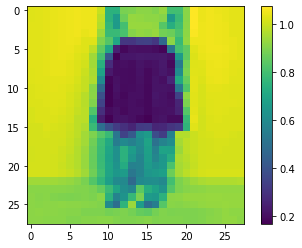

In [165]:
index = 13324
image = x_train.iloc[index].values.reshape(28,28)
label = y_train.iloc[index]

print(list(CATEGORIES.keys())[list(CATEGORIES.values()).index(label)])
print(label)
plot_image(image)


In [71]:
y_train.iloc[39000]

8.0

<Figure size 720x720 with 0 Axes>

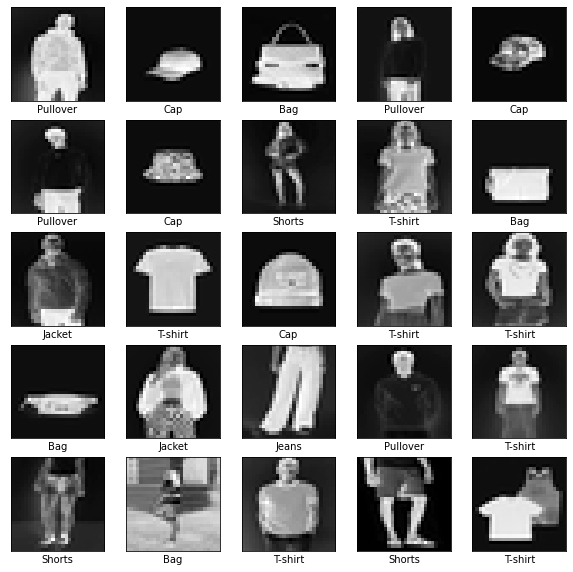

In [88]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.iloc[i].values.reshape(28,28), cmap=plt.cm.binary)
    label = y_train.iloc[i]
    x_label = list(CATEGORIES.keys())[list(CATEGORIES.values()).index(label)]
    plt.xlabel(x_label)
# plt.savefig('image.pdf')
plt.show()


In [89]:
cnn_model = tf.keras.Sequential([
    Conv2D(filters=32,kernel_size=1,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')   
])

In [90]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [91]:
x_train = x_train.values.reshape(-1,28,28)
y_train = y_train.values.reshape(-1,1)
print(x_train.shape)
print(y_train.shape)

(40000, 28, 28)
(40000, 1)


In [94]:
x_validate = x_validate.values.reshape(-1,28,28)
y_validate = y_validate.values.reshape(-1,1)
print(x_validate.shape)
print(y_validate.shape)

(6826, 28, 28)
(6826, 1)


In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate)
)

Text(0.5, 1.0, 'Train - Accuracy')

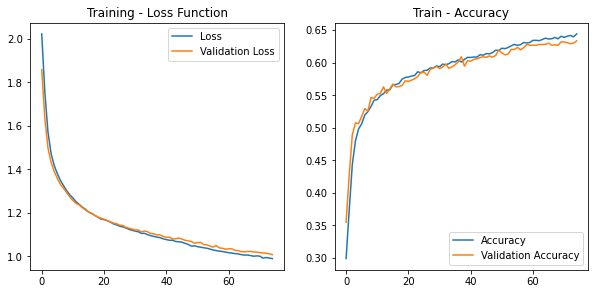

In [100]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [102]:
x_test = x_test.values.reshape(-1,28,28)
y_test = y_test.values.reshape(-1,1)
print(x_test.shape)
print(y_test.shape)

(5000, 28, 28)
(5000, 1)


In [142]:
predicted_classes = cnn_model.predict(x_test)

(5000, 10)

In [131]:
index =980
print(y_test[index])
predicted_list = predicted_classes[index]
index_max = np.argmax(predicted_list)
# print(sum(predicted_list))
# print(predicted_list)

print(index_max)


[0.]
5


KeyError: ignored

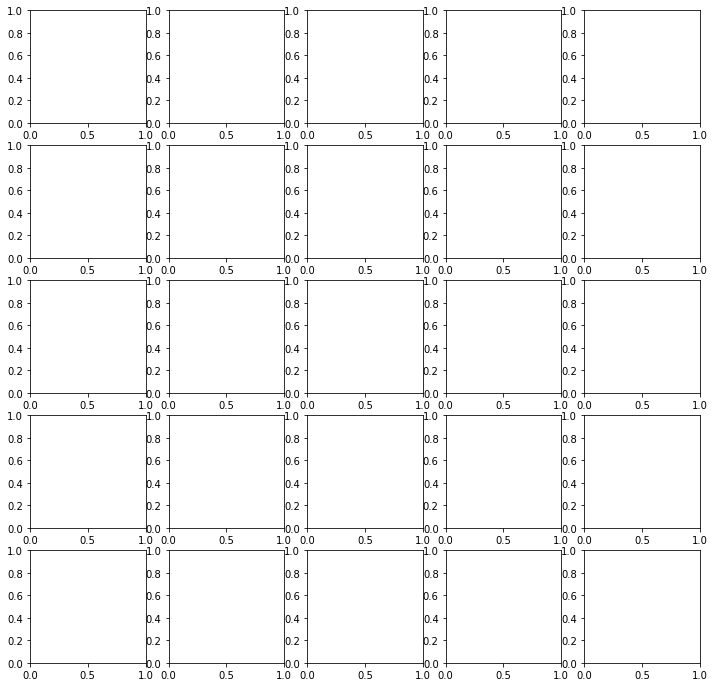

In [212]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
n = 0
for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    predicted_list = predicted_classes[i]
    index_max = np.argmax(predicted_list)

    predicted_class = list(CATEGORIES.keys())[list(CATEGORIES.values()).index(index_max)]
    original_class = list(CATEGORIES.keys())[list(CATEGORIES.values()).index(y_test[i][0])]
    if predicted_class ==original_class:
      n+=1
    axes[i].set_title(f"Original = {original_class}\n Predeicted = {predicted_class}")
    axes[i].axis('off')
print(n/(L * W)*100)
plt.subplots_adjust(wspace=0.5)

# MLP

In [166]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_dim=784),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [167]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=75)

In [190]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 0.9307 - accuracy: 0.6850 - 312ms/epoch - 2ms/step

Test accuracy: 0.6850000023841858


In [191]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [192]:
predictions = probability_model.predict(x_test)

In [202]:
index = 434
predictions[index]
print(np.argmax(predictions[index]))
print(y_test.iloc[index])

3
3.0


In [ ]:
print(np.array(x_test.iloc[0]).reshape(28,28))

64.0


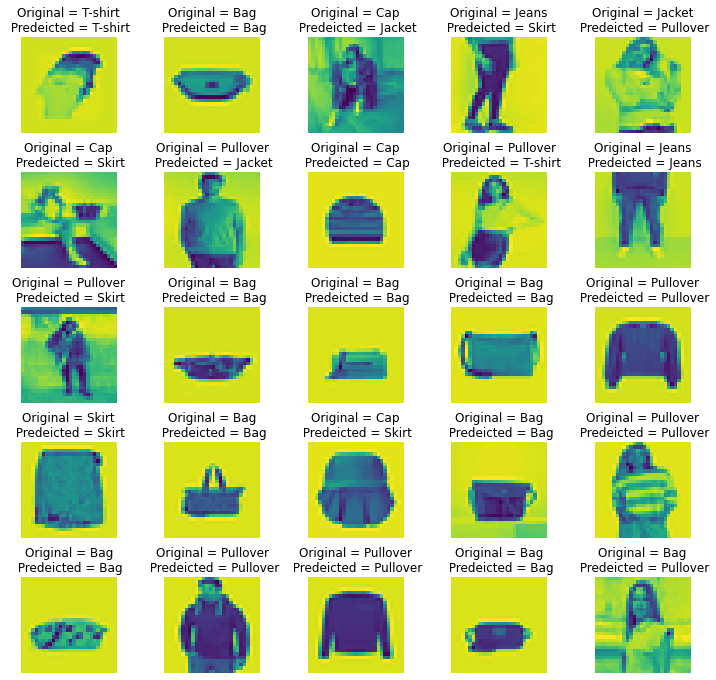

In [211]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
n = 0
for i in np.arange(0, L * W):  
    axes[i].imshow(np.array(x_test.iloc[i]).reshape(28,28))
    index_max = np.argmax(predictions[i])

    predicted_class = list(CATEGORIES.keys())[list(CATEGORIES.values()).index(index_max)]
    original_class = list(CATEGORIES.keys())[list(CATEGORIES.values()).index(y_test.iloc[i])]
    if predicted_class ==original_class:
      n+=1
    axes[i].set_title(f"Original = {original_class}\n Predeicted = {predicted_class}")
    axes[i].axis('off')
print(n/(L * W)*100)
plt.subplots_adjust(wspace=0.5)